In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

# *1. Visão Geral*

In [2]:
df = pd.read_csv('imoveis_zap_fortaleza_ready.csv',sep=';')
df.head()

,Preco,Bairro,tamanho (m²),qtd_quartos,qtd_banheiro,qtd_vagas
0,1380282.0,Engenheiro Luciano Cavalcante,119.0,3,3,2.0
1,591401.0,Aldeota,50.0,2,2,1.0
2,1300000.0,Aldeota,129.0,3,4,3.0
3,635000.0,Presidente Kennedy,73.0,3,2,2.0
4,499000.0,Cocó,91.0,3,3,2.0


In [3]:
#Removendo valores duplicados e nulos
df = df.dropna()
df = df.drop_duplicates()

In [4]:
round(df.describe(),2)

,Preco,tamanho (m²),qtd_quartos,qtd_banheiro,qtd_vagas
count,1292.00,1292.00,1292.00,1292.00,1292.00
mean,969180.01,102.03,2.76,2.88,2.30
std,793029.53,55.18,0.71,1.29,7.73
min,29000.00,26.00,1.00,1.00,1.00
25%,510000.00,61.00,2.00,2.00,1.00
50%,759500.00,94.00,3.00,3.00,2.00
75%,1199000.00,123.00,3.00,4.00,2.00
max,6400000.00,550.00,5.00,7.00,265.00


## *1.1 Tratando coluna "vagas"*

<Axes: ylabel='qtd_vagas'>

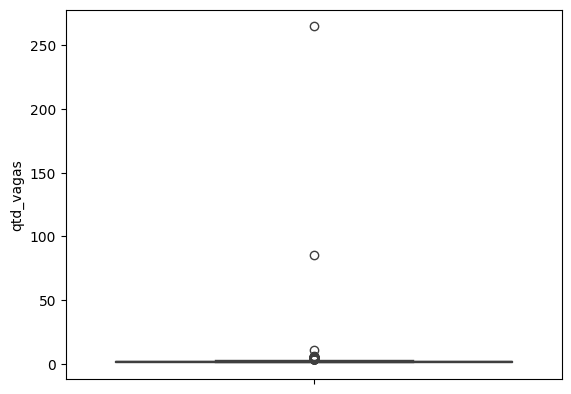

In [5]:
#Dispersão do número de vagas
sns.boxplot(df,y='qtd_vagas')

In [6]:
#Verificando linhas que possuem muitas vagas
df[df['qtd_vagas'] > 5]

,Preco,Bairro,tamanho (m²),qtd_quartos,qtd_banheiro,qtd_vagas
25,320000.0,Parque Iracema,65.0,3,2,6.0
726,419000.0,Cidade 2000,55.0,2,2,265.0
1307,690000.0,Cocó,70.0,2,2,11.0
1542,204000.0,Parque Santa Maria,38.0,2,1,85.0


In [7]:
#Para as linhas com 265, 11 e 85 vagas será adotado o valor "máximo normal" de 6 vagas.
df.loc[df['qtd_vagas'] > 5, 'qtd_vagas'] = 6
#Verificando mundaça
df[df['qtd_vagas'] > 5]

,Preco,Bairro,tamanho (m²),qtd_quartos,qtd_banheiro,qtd_vagas
25,320000.0,Parque Iracema,65.0,3,2,6.0
726,419000.0,Cidade 2000,55.0,2,2,6.0
1307,690000.0,Cocó,70.0,2,2,6.0
1542,204000.0,Parque Santa Maria,38.0,2,1,6.0


In [58]:
round(df.describe(),2)

,Preco,tamanho (m²),qtd_quartos,qtd_banheiro,qtd_vagas
count,1292.00,1292.00,1292.00,1292.00,1292.00
mean,969180.01,102.03,2.76,2.88,2.03
std,793029.53,55.18,0.71,1.29,0.96
min,29000.00,26.00,1.00,1.00,1.00
25%,510000.00,61.00,2.00,2.00,1.00
50%,759500.00,94.00,3.00,3.00,2.00
75%,1199000.00,123.00,3.00,4.00,2.00
max,6400000.00,550.00,5.00,7.00,6.00


# *2. Análise Exploratória dos Dados*

## *2.1. Correlação e Associação das variáveis numéricas*  

* O mercado imobiliário é assimétrico. Dominado por imóveis de valor mais baixo/médio, com uma longa "cauda" de imóveis de altíssimo padrão.
* Há uma tendência clara: quanto mais quartos e banheiros, mais caro o imóvel. Porém a faixa de preços para imóveis maiores é muito mais ampla.
* De 1 a 5 vagas, a tendência de aumento de preço se mantém. Imóveis com 6 vagas tem um comportamento de outlier.
* Forte correlação positiva entre tamanho (m²) e quantidade de vagas com o preço do imóvel.

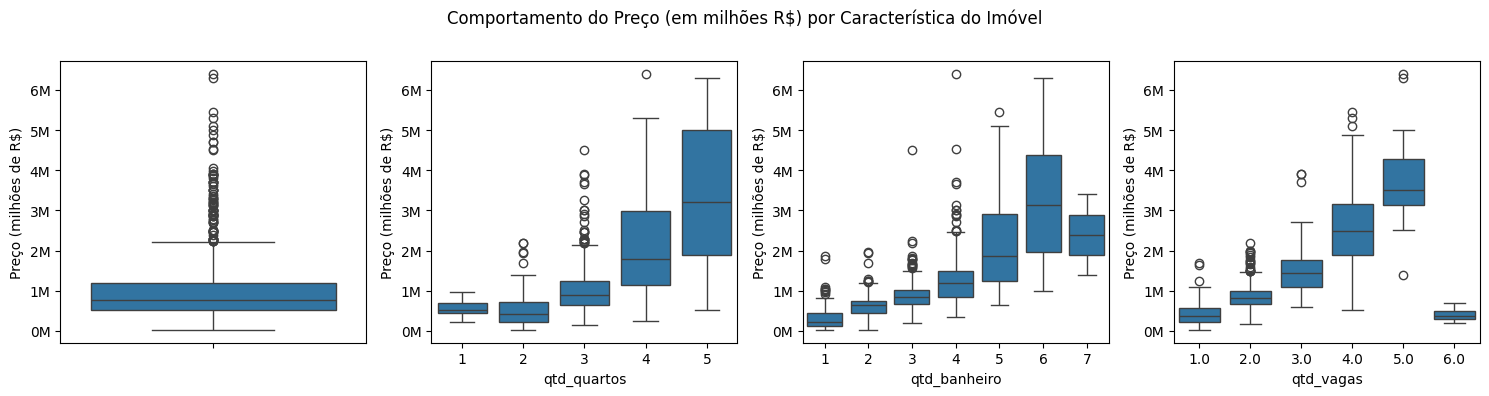

In [8]:
#Boxplots
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1,
                                      ncols=4,
                                      figsize=(15,4)
                                      )

fig.suptitle("Comportamento do Preço (em milhões R$) por Característica do Imóvel")

sns.boxplot(df,y='Preco',ax=ax1)
sns.boxplot(df,y='Preco',x='qtd_quartos',ax=ax2)
sns.boxplot(df,y='Preco',x='qtd_banheiro',ax=ax3)
sns.boxplot(df,y='Preco',x='qtd_vagas',ax=ax4)


#Corrigindo unidade
from matplotlib.ticker import FuncFormatter
def milhares_formatter(y, pos):
    """Formata o eixo y para mostrar valores em milhares."""
    return f'{int(y / 1000000)}M' # Adiciona um 'k' para indicar milhares

#Cria um objeto Formatter a partir da nossa função
formatter = FuncFormatter(milhares_formatter)

#Aplica o formatador em TODOS os eixos y
for ax in [ax1, ax2, ax3, ax4]:
    ax.yaxis.set_major_formatter(formatter)
    # Também podemos mudar o rótulo do eixo para ficar mais claro
    ax.set_ylabel('Preço (milhões de R$)')


plt.tight_layout()
fig.subplots_adjust(top=.85)
plt.show()

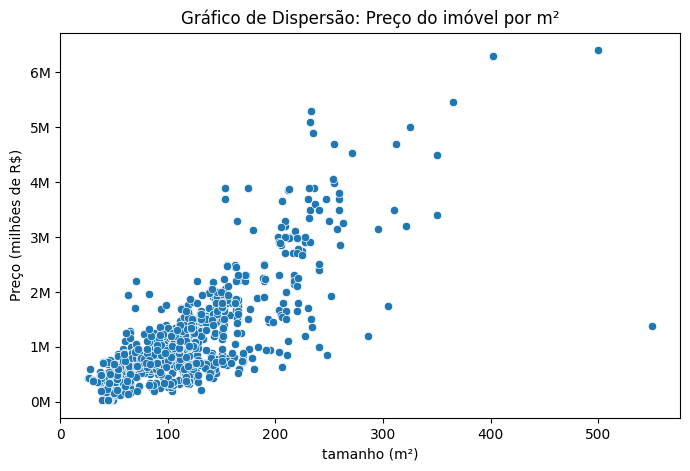

In [9]:
#Gráfico de dispersão preço e tamanho do imóvel
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(df,x='tamanho (m²)',y='Preco',ax=ax)
plt.title("Gráfico de Dispersão: Preço do imóvel por m²")

#Corrigindo unidade
formatter1 = FuncFormatter(milhares_formatter)

ax.yaxis.set_major_formatter(formatter1)
ax.set_ylabel('Preço (milhões de R$)')


plt.show()

<Axes: >

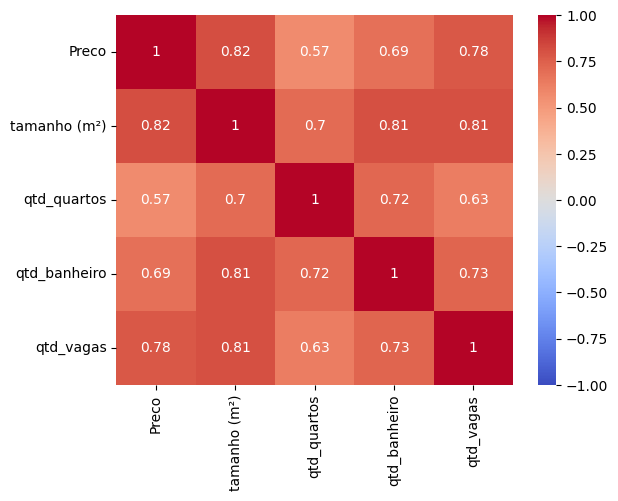

In [10]:
#Matriz de correlação de Pearson
sns.heatmap(df.corr(numeric_only=True),
             annot=True, 
             vmax=1,vmin=-1,
             cmap='coolwarm')

## *2.2. Correlação e Associação das variáveis categóricas*  

* A localização (Bairro) é um fator absolutamente crítico na determinação não apenas do preço, mas também da faixa de variação e do potencial de encontrar imóveis de extremo luxo.
* Não existe um mercado único, mas vários sub-mercados: mercado de luxo amplo e volátil do Meireles; o mercado de alto padrão mais estável de bairros como Aldeota e Cocó; e os mercados mais acessíveis como Mondubim e Parque Iracema.
* A simples contagem de anúncios já nos mostra os bairros com maior liquidez e atividade de mercado, como Engenheiro Luciano Cavalcante, Cocó, Aldeota e Meireles.

In [11]:
#Essa verificação evidencia a necessidade de etapas adicionais de tratamento
df['Bairro'] = df['Bairro'].str.replace("Flat para comprar em",'')
df['Bairro'] = df['Bairro'].str.replace("Imóvel para comprar em",'')
df['Bairro'] = df['Bairro'].str.replace(", Aquiraz",'')
df['Bairro'] = df['Bairro'].str.replace("Duplex para comprar em",'')

In [12]:
df['Bairro']

0       Engenheiro Luciano Cavalcante
1                             Aldeota
2                             Aldeota
3                  Presidente Kennedy
4                                Cocó
                    ...              
1765                    Edson Queiroz
1766                         Mucuripe
1767                         Mucuripe
1768                          Aldeota
1769                      Cidade 2000
Name: Bairro, Length: 1292, dtype: object

In [13]:
#Tabela de frequência para os bairros
tab_freq_bairros = df['Bairro'].value_counts().reset_index()
tab_freq_bairros.columns = ['Bairro','Freq.Absoluta']
tab_freq_bairros['Freq.Relativa (%)'] = round(100*(tab_freq_bairros['Freq.Absoluta']/tab_freq_bairros['Freq.Absoluta'].sum()),2)
tab_freq_bairros['Freq.Acumulada (%)'] =  tab_freq_bairros['Freq.Relativa (%)'].cumsum()
tab_freq_bairros

,Bairro,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,Engenheiro Luciano Cavalcante,185,14.32,14.32
1,Cocó,164,12.69,27.01
2,Meireles,127,9.83,36.84
3,Aldeota,125,9.67,46.51
4,Papicu,74,5.73,52.24
...,...,...,...,...
74,Pedras,1,0.08,99.65
75,Monte Castelo,1,0.08,99.73
76,Pici,1,0.08,99.81
77,Jóquei Clube,1,0.08,99.89


In [14]:
#Apresentaremos apenas os bairros que representam 80% da nossa amostra
tab_freq_bairros[tab_freq_bairros['Freq.Absoluta'] > 10].head(21)

,Bairro,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,Engenheiro Luciano Cavalcante,185,14.32,14.32
1,Cocó,164,12.69,27.01
2,Meireles,127,9.83,36.84
3,Aldeota,125,9.67,46.51
4,Papicu,74,5.73,52.24
5,Guararapes,50,3.87,56.11
6,Dionisio Torres,45,3.48,59.59
7,Parque Iracema,40,3.10,62.69
8,Paupina,33,2.55,65.24
9,Mucuripe,26,2.01,67.25


In [15]:
#Comportamento do Preço por bairro
analise_por_bairro = df.groupby('Bairro')['Preco'].agg(['mean','median','count', 'std']).sort_values('median', ascending=False)

# Renomeia as colunas para ficar mais claro
analise_por_bairro = analise_por_bairro.rename(columns={
    'mean': 'Preco_Medio',
    'median': 'Preco_Mediano',
    'count': 'Qtd_Imoveis',
    'std': 'Dispersao_Precos'
})

#Ordenando valores em ordem descrescente para preço médio
analise_por_bairro = analise_por_bairro.sort_values(by=['Preco_Medio','Qtd_Imoveis'], ascending=[False,False])


#Facilitando a leitura
colunas_de_preco = ['Preco_Medio','Preco_Mediano', 'Dispersao_Precos']
for coluna in colunas_de_preco:
    # A mágica acontece aqui:
    # 'na_action='ignore'' garante que valores nulos (NaN) não causem erro
    analise_por_bairro[coluna] = analise_por_bairro[coluna].map('R$ {:,.2f}'.format, na_action='ignore')


In [16]:
#Apresentaremos apenas os 15 primeiros bairros que possuem pelo menos mais de 10 observações
analise_por_bairro[analise_por_bairro['Qtd_Imoveis'] > 15].head(15)

,Preco_Medio,Preco_Mediano,Qtd_Imoveis,Dispersao_Precos
Bairro,,,,
Meireles,"R$ 1,866,996.22","R$ 1,230,000.00",127,"R$ 1,389,764.66"
Mucuripe,"R$ 1,392,280.69","R$ 855,000.00",26,"R$ 1,421,835.11"
Guararapes,"R$ 1,303,037.40","R$ 958,500.00",50,"R$ 842,623.23"
Manuel Dias Branco,"R$ 1,281,157.12","R$ 1,299,000.00",17,"R$ 459,307.20"
Aldeota,"R$ 1,236,306.74","R$ 960,000.00",125,"R$ 735,498.00"
Cocó,"R$ 1,131,193.39","R$ 965,000.00",164,"R$ 536,221.06"
Engenheiro Luciano Cavalcante,"R$ 1,043,657.48","R$ 949,000.00",185,"R$ 502,010.66"
Dionisio Torres,"R$ 970,875.96","R$ 850,000.00",45,"R$ 441,493.16"
Parque Iracema,"R$ 770,872.00","R$ 775,000.00",40,"R$ 200,719.66"


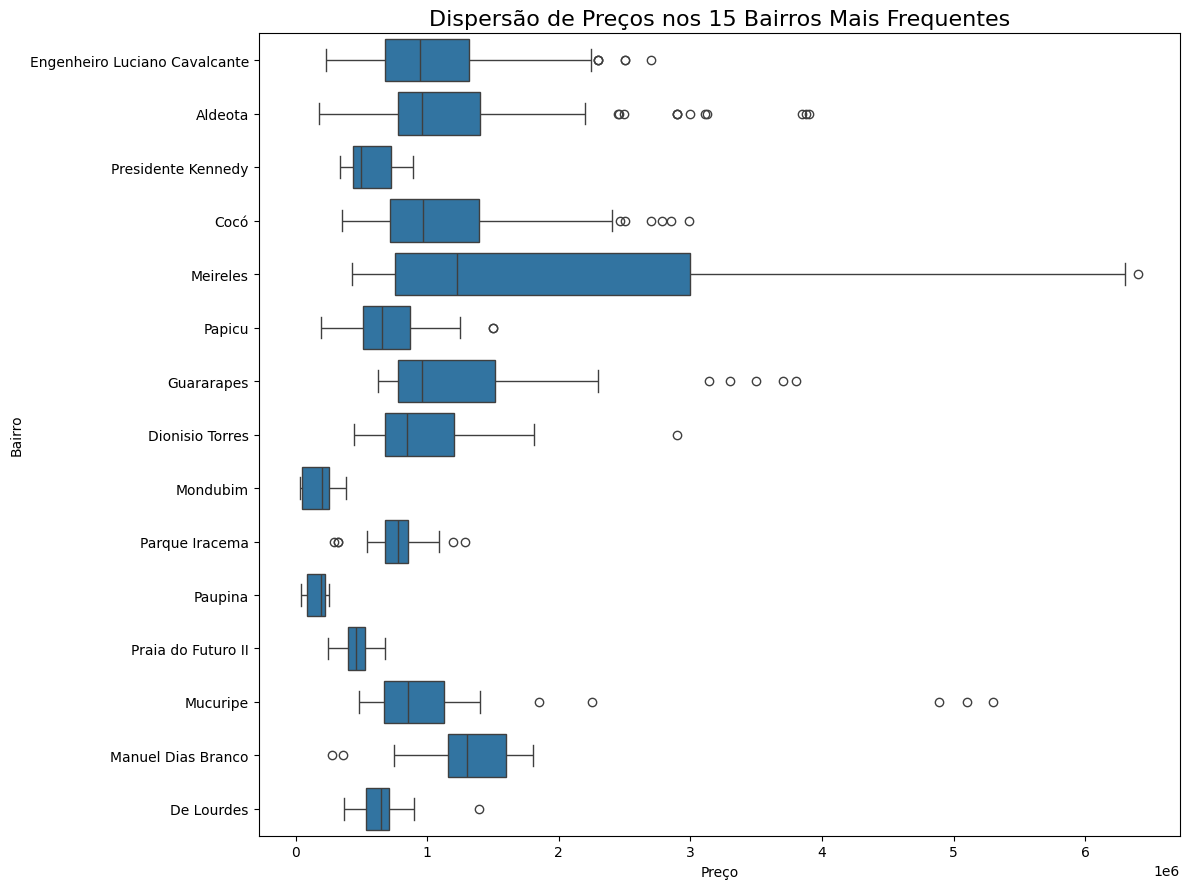

In [17]:
#Gerando boxplot gráfico de dispersão, apenas para os 15 primeiros bairros com mais observações
top_bairros = df['Bairro'].value_counts().nlargest(15).index
df_para_plot = df[df['Bairro'].isin(top_bairros)]

fig, ax = plt.subplots(figsize=(12, 9)) 
sns.boxplot(
    data=df_para_plot, 
    x='Preco', 
    y='Bairro', 
    ax=ax)

ax.set_title('Dispersão de Preços nos 15 Bairros Mais Frequentes', fontsize=16)
ax.set_xlabel('Preço')
ax.set_ylabel('Bairro')

# --- 5. Usa o tight_layout para ajustar tudo automaticamente ---
plt.tight_layout()

plt.show()

# *3. Alimentando Modelos Preditivos*
* Para os modelos predivitos iremos trabalhar apenas com os bairros mais relevantes(com maior observações)

### *3.1. Data Prep*

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [19]:
top_bairros = df['Bairro'].value_counts().nlargest(15).index

In [20]:
top_bairros

Index(['Engenheiro Luciano Cavalcante', 'Cocó', 'Meireles', 'Aldeota',
       'Papicu', 'Guararapes', 'Dionisio Torres', 'Parque Iracema', 'Paupina',
       'Mucuripe', 'Mondubim', 'Praia do Futuro II', 'De Lourdes',
       'Presidente Kennedy', 'Manuel Dias Branco'],
      dtype='object', name='Bairro')

In [21]:
#Filtrando dados 
df_ML = df[df['Bairro'].isin(top_bairros)].copy()

In [22]:
#Escolhendo o bairro de referência --> Aquele com menor preço médio
bairro_referencia = 'Mondubim'

todos_os_bairros = list(df_ML['Bairro'].unique())

# Remove o bairro de referência da lista
if bairro_referencia in top_bairros:
    todos_os_bairros.remove(bairro_referencia)

# Cria a nova ordem, colocando o seu bairro de referência EM PRIMEIRO LUGAR
ordem_personalizada = [bairro_referencia] + todos_os_bairros


# Define qual é a ordem correta da sua categoria
df_ML['Bairro'] = pd.Categorical(df_ML['Bairro'], categories=ordem_personalizada, ordered=True)

In [23]:
df_ML

,Preco,Bairro,tamanho (m²),qtd_quartos,qtd_banheiro,qtd_vagas
0,1380282.0,Engenheiro Luciano Cavalcante,119.0,3,3,2.0
1,591401.0,Aldeota,50.0,2,2,1.0
2,1300000.0,Aldeota,129.0,3,4,3.0
3,635000.0,Presidente Kennedy,73.0,3,2,2.0
4,499000.0,Cocó,91.0,3,3,2.0
...,...,...,...,...,...,...
1763,3354626.0,Meireles,231.0,4,5,5.0
1764,689000.0,Dionisio Torres,50.0,2,2,1.0
1766,680000.0,Mucuripe,83.0,2,3,1.0
1767,550000.0,Mucuripe,93.0,3,3,2.0


In [24]:
#Criação das variáveis dummies para bairro
df_ML = pd.get_dummies(df_ML,drop_first=True,dtype=int)

#Definição das variaveis
y_rlm = df_ML[['Preco']]
x_rlm = df_ML.drop(['Preco','qtd_quartos','qtd_banheiro'],axis=1)

In [25]:
#Salvando em arquivo CSV
nome_do_arquivo = 'imoveis_zap_fortaleza_ML.csv'
df_ML.to_csv(nome_do_arquivo, index=False, sep=';', encoding='utf-8-sig')

In [26]:
#Divisão em treino e teste da base
x_train, x_test, y_train, y_test = train_test_split(x_rlm, y_rlm, test_size=0.3, random_state=42)

## *3.1. Regressão Linear Múltipla*
* Visando Compreender o peso de cada variável na composição do custo do imóvel, inicialmente trabalharemos com a Reg.Linear Múltipla
* Statsmodels para interpretação dos coeficientes e comportamento da regressão
* LinearRegression para avaliar performance e geneleralização da regressão

In [27]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [28]:
#Treinando Modelo (statsmodels)
modelo_rlm = sm.OLS(y_rlm,sm.add_constant(x_rlm)).fit()

In [29]:
#Alimentando o modelo LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

# Fazendo previsões no conjunto de treino e teste
y_pred_lr_treino = model_lr.predict(x_train)
y_pred_lr_teste = model_lr.predict(x_test)

In [30]:
# Calculando as métricas de performance
print("\n--- Regressão Linear Múltipla ---")

#R²
r2_lr_treino = r2_score(y_train, y_pred_lr_treino)
print(f"R² (R-squared) treino: {r2_lr_treino:.4f}")
r2_lr_teste = r2_score(y_test, y_pred_lr_teste)
print(f"R² (R-squared) teste: {r2_lr_teste:.4f}")

#mae
mae_lr_treino = mean_absolute_error(y_train, y_pred_lr_treino)
print(f"Erro Médio Absoluto (MAE) treino: R$ {mae_lr_treino:,.2f}")
mae_lr_teste = mean_absolute_error(y_test, y_pred_lr_teste)
print(f"Erro Médio Absoluto (MAE) teste: R$ {mae_lr_teste:,.2f}")


#rmse
rmse_lr_treino = root_mean_squared_error(y_train, y_pred_lr_treino)
print(f"Erro Médio Absoluto (MAE) treino: R$ {rmse_lr_treino:,.2f}")
rmse_lr_teste = root_mean_squared_error(y_test, y_pred_lr_teste)
print(f"Erro Médio Absoluto (MAE) teste: R$ {rmse_lr_teste:,.2f}")


--- Regressão Linear Múltipla ---
R² (R-squared) treino: 0.7703
R² (R-squared) teste: 0.6894
Erro Médio Absoluto (MAE) treino: R$ 271,773.50
Erro Médio Absoluto (MAE) teste: R$ 290,498.50
Erro Médio Absoluto (MAE) treino: R$ 401,854.15
Erro Médio Absoluto (MAE) teste: R$ 462,182.25


### *3.1.1 Avaliando Modelo*

In [31]:
#Visão geral
print(modelo_rlm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 04 Aug 2025   Prob (F-statistic):          2.57e-273
Time:                        12:31:37   Log-Likelihood:                -13916.
No. Observations:                 969   AIC:                         2.787e+04
Df Residuals:                     952   BIC:                         2.795e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


*Conclusões da Regressão Linear Multipla*
O modelo é robusto e explica 74.6% da variação nos preços dos imóveis. Isso é um resultado muito forte para dados do mercado imobiliário, indicando que as variáveis escolhidas (tamanho, vagas e bairro) formam uma excelente base para prever o preço. Apenas 25.4% da variação de preço se deve a outros fatores não incluídos no modelo (como idade do imóvel, acabamento, andar, etc.).

* *m² e qtd_vagas:* O tamanho do imóvel e o número de vagas de garagem são os fatores individuais mais importantes e estatisticamente significativos para determinar o preço. 
    * Para cada metro quadrado a mais, o preço tende a aumentar, em média, R$ 7.570. 
    * Cada vaga de garagem extra está associada a um aumento médio de R$ 287.500 no valor do imóvel.

* *Entendendo os bairros, referência: Mondubin:*
    * "Bairro Premium": Bairros como Meireles e Mucuripe possuem um "prêmio" de valorização claro.
        * Meireles, por exemplo, tende a ser em média R$ 417.900 mais caro do que um imóvel no Mondubim.
    * "Bairros Caros": a percepção de que bairros como Cocó e Aldeota são "caros" pode ser mais explicada pelo fato de eles terem, em média, imóveis maiores e com mais vagas, do que por um "prêmio" inerente à localização em si.
        * Se enquadram no caso de alto coeficiente de regressão, porém não possuem significancia estatística, o que indica que a diferença nos valores podem ser pelo acaso dentro da amostra coletada.
* *Base de Preço e o Ponto de Partida:* 
    * A constante negativa não significa que um imóvel pode ter preço negativo. Ela representa o ponto de partida matemático da equação. Um preço teórico para um apartamento no Mondubin (referência) com 0 m².
        * O preço de qualquer imóvel real se torna positivo assim que o forte efeito do tamanho e das vagas é adicionado, mostrando que estas características são essenciais para compor o valor.

## *3.2 Random Forest Regressor*
* O Random Forest Regressor é um tipo de ensemble baseado em um método chamado Bagging.

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
#Criando modelo
rfr = RandomForestRegressor(random_state=42,n_jobs=-1)

In [34]:
#Estimando parametros através do Grid
param_grid = {
    'n_estimators': [100,200,300],         # Número de árvores na floresta
    'max_depth': [10,20,None],           # Profundidade máxima de cada árvore
    'min_samples_split': [2, 5, 10],       # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1,2,4]         # Mínimo de amostras em um nó folha
}

#validação cruzada com 3 "dobras" para cada combinação
grid_search = GridSearchCV(
    estimator=rfr, 
    param_grid=param_grid, 
    cv=3, 
    scoring='neg_mean_absolute_error',
    verbose=2, # Mostra o progresso do treinamento
    n_jobs=-1
)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Users\Igor\Desktop\Python\VS_CODE\projeto_igor\.venv\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [35]:
#Avaliar melhor resultado
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [36]:
#Aplicando melhor resultado encontrado
model_rfr = grid_search.best_estimator_

In [37]:
#Verificando o Desempenho
#Base de treino
y_pred_rfr_treino = model_rfr.predict(x_train)

#Base de teste
y_pred_rfr_teste = model_rfr.predict(x_test)

In [38]:
# Calculando as métricas de performance
print("\n--- Random Forest Regressor ---")

#r²
r2_rfr_treino = r2_score(y_train,y_pred_rfr_treino)
print(f"R² (R-squared) treino: {r2_rfr_treino:.4f}")
r2_rfr_teste = r2_score(y_test, y_pred_rfr_teste)
print(f"R² (R-squared) teste: {r2_rfr_teste:.4f}")

#mae
mae_rfr_treino = mean_absolute_error(y_train,y_pred_rfr_treino)
print(f"Erro Médio Absoluto (MAE) treino: R$ {mae_rfr_treino:,.2f}")
mae_rfr_teste = mean_absolute_error(y_test, y_pred_rfr_teste)
print(f"Erro Médio Absoluto (MAE) teste: R$ {mae_rfr_teste:,.2f}")

#rmse
rmse_rfr_treino = root_mean_squared_error(y_train,y_pred_rfr_treino)
print(f"Erro Médio Absoluto (RMSE) treino: R$ {rmse_rfr_treino:,.2f}")
rmse_rfr_teste = root_mean_squared_error(y_test, y_pred_rfr_teste)
print(f"Erro Médio Absoluto (RMSE) teste: R$ {rmse_rfr_teste:,.2f}")


--- Random Forest Regressor ---
R² (R-squared) treino: 0.9536
R² (R-squared) teste: 0.7333
Erro Médio Absoluto (MAE) treino: R$ 125,973.17
Erro Médio Absoluto (MAE) teste: R$ 241,283.69
Erro Médio Absoluto (RMSE) treino: R$ 180,593.55
Erro Médio Absoluto (RMSE) teste: R$ 428,292.73


## *3.3. XGBoost (eXtreme Gradient Boosting)*
* O Gradient Boosting é um tipo de ensemble baseado em um método chamado Boosting.

In [39]:
from xgboost import XGBRegressor

In [40]:
#Criando Modelo
xgb = XGBRegressor(random_state=42,
                    n_jobs=-1)

In [41]:
#Estimando parametros através do Grid
param_grid_xgb = {
    'n_estimators': [200, 400],             # Testa com um número maior de árvores
    'learning_rate': [0.05, 0.1],           # Testa uma taxa de aprendizado mais lenta e uma padrão
    'max_depth': [5, 7],                    # Limita a profundidade para evitar overfitting
    'subsample': [0.7, 1.0]                 # Testa usando todas as amostras ou apenas 70%
}

#validação cruzada com 3 "dobras" para cada combinação
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=3, 
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1
)
grid_search_xgb.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [5, 7], 'n_estimators': [200, 400], 'subsample': [0.7, 1.0]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [42]:
#Consultando melhor resultado
print(grid_search_xgb.best_params_)

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}


In [43]:
#Assumindo melhor modelo
model_xgb = grid_search_xgb.best_estimator_

In [44]:
#Verificando o Desempenho
#Base de treino
y_pred_xgb_treino = model_xgb.predict(x_train)
#Base de teste
y_pred_xgb_teste = model_xgb.predict(x_test)

In [45]:
# Calculando as métricas de performance
print("\n--- XGBoost Regressor ---")

#r²
r2_xgb_treino = r2_score(y_train, y_pred_xgb_treino)
print(f"R² (R-squared) treino: {r2_xgb_treino:.4f}")
r2_xgb_teste = r2_score(y_test, y_pred_xgb_teste)
print(f"R² (R-squared) teste: {r2_xgb_teste:.4f}")

#mae
mae_xgb_treino = mean_absolute_error(y_train, y_pred_xgb_treino)
print(f"Erro Médio Absoluto (MAE) treino: R$ {mae_rfr_treino:,.2f}")
mae_xgb_teste = mean_absolute_error(y_test, y_pred_xgb_teste)
print(f"Erro Médio Absoluto (MAE) teste: R$ {mae_xgb_teste:,.2f}")

#rmse
rmse_xgb_treino = root_mean_squared_error(y_train, y_pred_xgb_treino)
print(f"Erro Médio Absoluto (RMSE) treino: R$ {rmse_xgb_treino:,.2f}")
rmse_xgb_teste = root_mean_squared_error(y_test, y_pred_xgb_teste)
print(f"Erro Médio Absoluto (RMSE) teste: R$ {rmse_xgb_teste:,.2f}")


--- XGBoost Regressor ---
R² (R-squared) treino: 0.9547
R² (R-squared) teste: 0.7256
Erro Médio Absoluto (MAE) treino: R$ 125,973.17
Erro Médio Absoluto (MAE) teste: R$ 244,678.00
Erro Médio Absoluto (RMSE) treino: R$ 178,500.73
Erro Médio Absoluto (RMSE) teste: R$ 434,408.44


## *3.4. Rede Neural Artificial*

In [46]:
from sklearn.neural_network import MLPRegressor

Etapa adicional para escalonamento dos dados

In [47]:
#Escalonamento dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [48]:
#Definição inicial do modelo
mlp = MLPRegressor(max_iter=1000, early_stopping=True, random_state=42)

In [49]:
#Etapa de tunnning 
param_grid_mlp = {
    'hidden_layer_sizes': [(50, 25), (100, 50), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_mlp,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1
)

grid_search_mlp.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\Igor\Desktop\Python\VS_CODE\projeto_igor\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,estimator,MLPRegressor(...ndom_state=42)
,param_grid,"{'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001, ...], 'hidden_layer_sizes': [(50, ...), (100, ...), ...], 'learning_rate_init': [0.001, 0.01]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [50]:
#Consultando melhor configuração
print(grid_search_mlp.best_params_)

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01}


In [51]:
#Assumindo melhor modelo
model_rna = grid_search_mlp.best_estimator_

In [52]:
#Verificando o Desempenho
#Base de treino
y_pred_rna_treino = model_rna.predict(x_train_scaled)
#Base de teste
y_pred_rna_teste = model_rna.predict(x_test_scaled)

In [53]:
# Calculando as métricas de performance
print("\n--- RNA Keras Regressor ---")

#r²
r2_rna_treino = r2_score(y_train, y_pred_rna_treino)
print(f"R² (R-squared) treino: {r2_rna_treino:.4f}")
r2_rna_teste = r2_score(y_test, y_pred_rna_teste)
print(f"R² (R-squared) teste: {r2_rna_teste:.4f}")

#mae
mae_rna_treino = mean_absolute_error(y_train, y_pred_rna_treino)
print(f"Erro Médio Absoluto (MAE) treino: R$ {mae_rna_treino:,.2f}")
mae_rna_teste = mean_absolute_error(y_test, y_pred_rna_teste)
print(f"Erro Médio Absoluto (MAE) teste: R$ {mae_rna_teste:,.2f}")

#rmse
rmse_rna_treino = root_mean_squared_error(y_train, y_pred_rna_treino)
print(f"Erro Médio Absoluto (RMSE) treino: R$ {rmse_rna_treino:,.2f}")
rmse_rna_teste = root_mean_squared_error(y_test, y_pred_rna_teste)
print(f"Erro Médio Absoluto (RMSE) teste: R$ {rmse_rna_teste:,.2f}")


--- RNA Keras Regressor ---
R² (R-squared) treino: 0.7904
R² (R-squared) teste: 0.6387
Erro Médio Absoluto (MAE) treino: R$ 265,629.39
Erro Médio Absoluto (MAE) teste: R$ 300,657.88
Erro Médio Absoluto (RMSE) treino: R$ 383,881.99
Erro Médio Absoluto (RMSE) teste: R$ 498,524.73


# *4. Agregando resultados para compração*

In [54]:
dados_comparativos = {
    'Regressão Linear Múltipla': {
        'R² (Treino)': r2_lr_treino,
        'R² (Teste)': r2_lr_teste, 
        'MAE (Treino)': mae_lr_treino,
        'MAE (Teste)': mae_lr_teste,
        'RMSE (Treino)': rmse_lr_treino,
        'RMSE (Teste)':rmse_lr_teste
    },
    'Random Forest (Otimizado)': {
        'R² (Treino)': r2_rfr_treino,
        'R² (Teste)': r2_rfr_teste,
        'MAE (Treino)': mae_rfr_treino,
        'MAE (Teste)': mae_rfr_teste,
        'RMSE (Treino)': rmse_rfr_treino,
        'RMSE (Teste)':rmse_rfr_teste
    },
    'XGBoost (Otimizado)': {
        'R² (Treino)': r2_xgb_treino,
        'R² (Teste)': r2_xgb_teste,
        'MAE (Treino)': mae_xgb_treino,
        'MAE (Teste)': mae_xgb_teste,
        'RMSE (Treino)': rmse_xgb_treino,
        'RMSE (Teste)':rmse_xgb_teste
    },
    'Rede Neural (Otimizado)': {
        'R² (Treino)': r2_rna_treino, # Keras não tem .score() direto
        'R² (Teste)': r2_rna_teste,
        'MAE (Treino)': mae_rna_treino,
        'MAE (Teste)': mae_rna_teste,
        'RMSE (Treino)': rmse_rna_treino,
        'RMSE (Teste)':rmse_rna_teste
    }
}

df_resultados = pd.DataFrame(dados_comparativos).T

In [55]:
round(df_resultados,2)

,R² (Treino),R² (Teste),MAE (Treino),MAE (Teste),RMSE (Treino),RMSE (Teste)
Regressão Linear Múltipla,0.77,0.69,271773.50,290498.50,401854.15,462182.25
Random Forest (Otimizado),0.95,0.73,125973.17,241283.69,180593.55,428292.73
XGBoost (Otimizado),0.95,0.73,129643.35,244678.00,178500.73,434408.44
Rede Neural (Otimizado),0.79,0.64,265629.39,300657.88,383881.99,498524.73


Após comparar os quatro algoritmos de regressão, o *Random Forest Regressor* foi escolhido como o melhor modelo para a previsão de preços. 
* Maior poder preditivo, explicando 73% da variação dos preços nos dados de teste (R²). 
* Apresentou o menor Erro Médio Absoluto (MAE) e o menor Erro Quadrático Médio (RMSE), tornando-o o mais preciso e confiável. 
O XGBoost foi um competidor muito próximo, confirmando a superioridade dos modelos de ensemble de árvores para este tipo de problema. 

In [56]:
# Salvando modelo para usar na aplicação
import joblib
nome_arquivo_modelo = 'modelo_random_forest.joblib'

# Salva o objeto do modelo no arquivo
joblib.dump(model_rfr, nome_arquivo_modelo)

['modelo_random_forest.joblib']

In [57]:
#Salvando colunas para a aplicação
model_columns = list(x_train.columns)
joblib.dump(model_columns, 'model_columns.joblib')

['model_columns.joblib']